# Übung 6
von Ege Cabuk und Nils Fischer


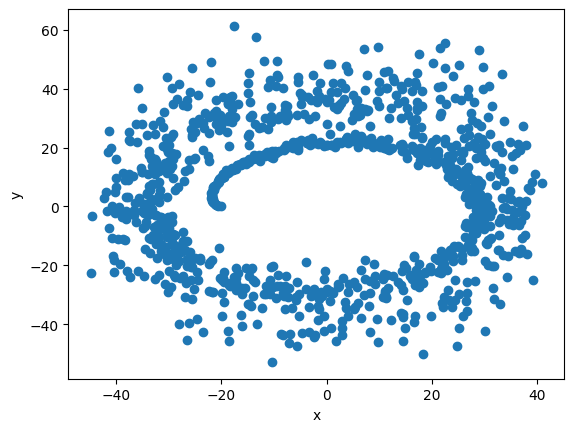

In [4]:
# 6.1
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

np.random.seed(1234)
u = np.arange(0, 101, 0.1)

x = -2 * (10 + np.sqrt(u)) * np.cos(0.15 * u) + np.random.normal(0, 0.05 * u)
y = 3 * (4 + np.sqrt(u)) * np.sin(0.15 * u) + np.random.normal(0, 0.1 * u)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

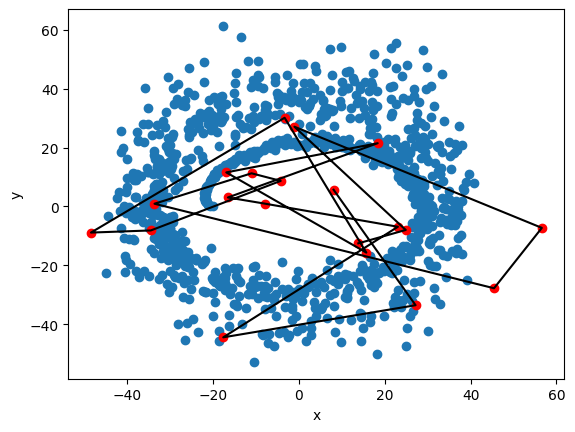

In [21]:
class SOM2d:
    def __init__(self, grid_dim: tuple[int, int, int], learning_rate: float):
        self.lr = learning_rate
        self.grid_dim = grid_dim
        self.weights = np.random.randn(*grid_dim) * 20
        self.indices = np.indices(grid_dim[:2]).transpose(1, 2, 0)  # contains indices
        self.last_winner = None
        self.last_input = None

    def forward(self, input: np.array, update=True): # 6.4
        distances = np.linalg.norm(self.weights - input, axis=-1)
        min_index = np.argmin(distances)
        min_index = np.array([min_index // self.grid_dim[1], min_index % self.grid_dim[1]])
        self.weights += self.lr * (input - self.weights) * self.reach_fun(self.distance(min_index)) if update else 0
        self.last_winner = min_index
        self.last_input = input
        self.lr *= 0.999

    def reach_fun(self, x: np.array):
        r = sum(self.grid_dim[:2]) - 2 * self.grid_dim[2]
        result = -(1 / r) * x + 1
        return result[:, :, np.newaxis]

    def distance(self, x: np.array):
        return np.sum(np.abs(self.indices - x), axis=-1)

    def plot(self, points: tuple[int, int], highlight=False): # 6.2 & 6.3
        fig, ax = plt.subplots()
        grid_data = self.weights
        ax.scatter(points[0], points[1])

        self.plot_lines(ax)

        grid_data = grid_data.reshape(-1, 2)
        ax.scatter(grid_data[:, 0], grid_data[:, 1], color="red")

        if highlight: # 6.3
            ax.scatter(self.last_input[:1], self.last_input[1:], color="#39FF14", s=100)
            weights = self.weights[0]
            ax.scatter(weights[0], weights[1], s=100, color='#39FF14')

        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    def plot_zones(self, points: tuple[int, int]): # 6.5
        dim = np.prod(self.grid_dim[:2])
        weights = self.weights.reshape(dim, self.grid_dim[2])
        zones = [[[weight[0]],[weight[1]]] for weight in weights]
        for x, y in zip(*points):
            distances = np.linalg.norm(self.weights - np.array([x,y]), axis=-1)
            index = np.argmin(distances)
            zones[index][0].append(x)
            zones[index][1].append(y)

        fig, ax = plt.subplots()
        for zone, color in zip(zones, list(colors.XKCD_COLORS)[:len(zones)]):
            ax.scatter(zone[0], zone[1], color=color)

        self.plot_lines(ax)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()


    def plot_lines(self, ax):
        for i in range(self.weights.shape[0]):
            ax.plot(self.weights[i, :, 0], self.weights[i, :, 1], color='black')
        for j in range(self.weights.shape[1]):
            ax.plot(self.weights[:, j, 0], self.weights[:, j, 1], color='black')





# 6.2
som = SOM2d((1, 20, 2), 0.1)
som.plot((x, y))


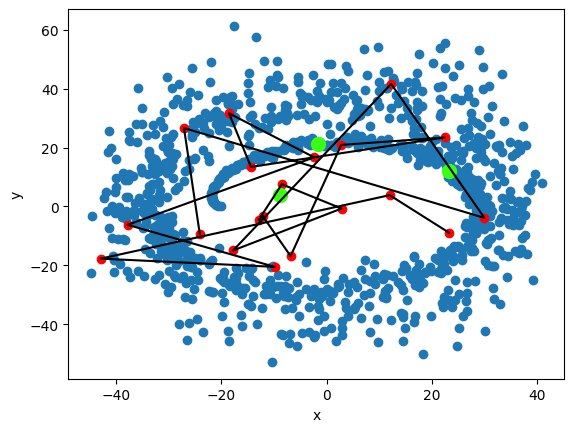

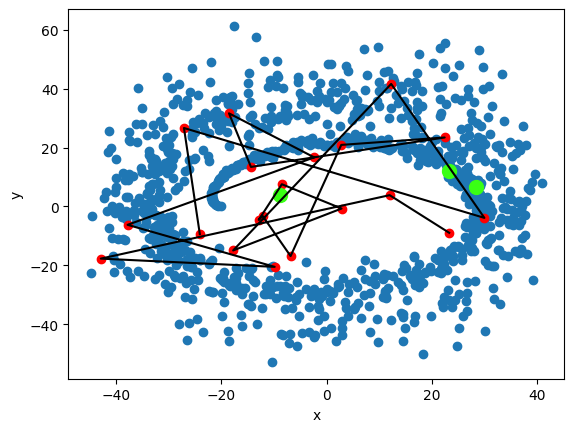

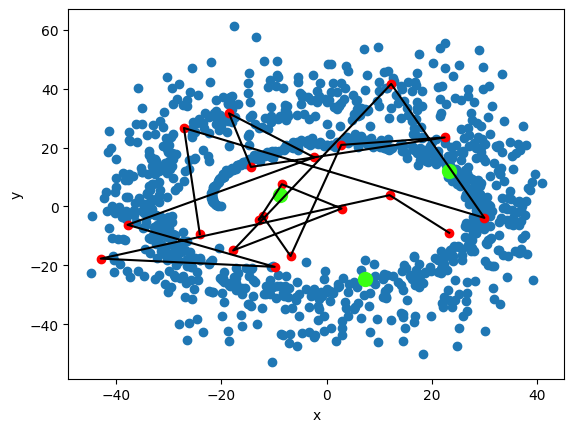

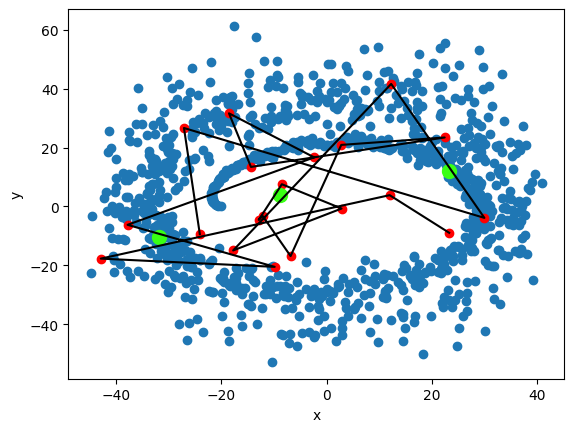

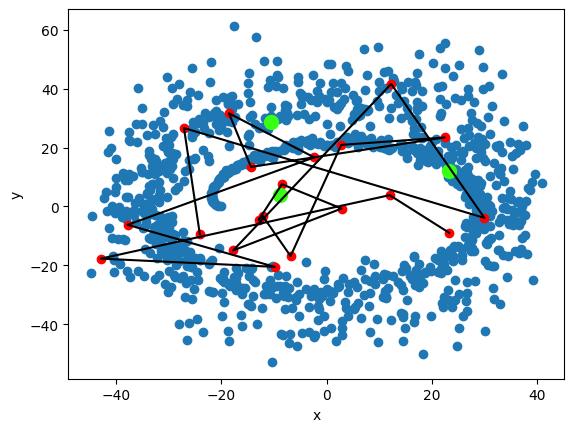

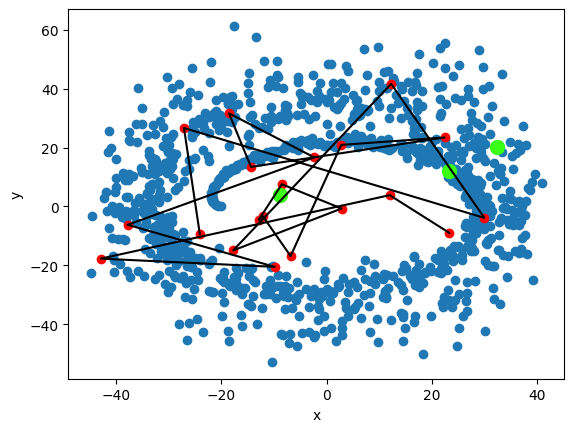

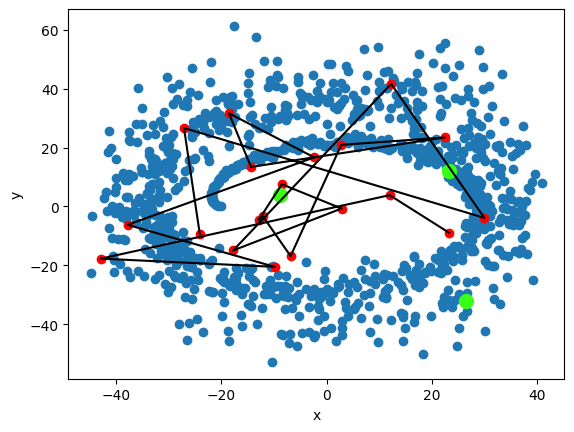

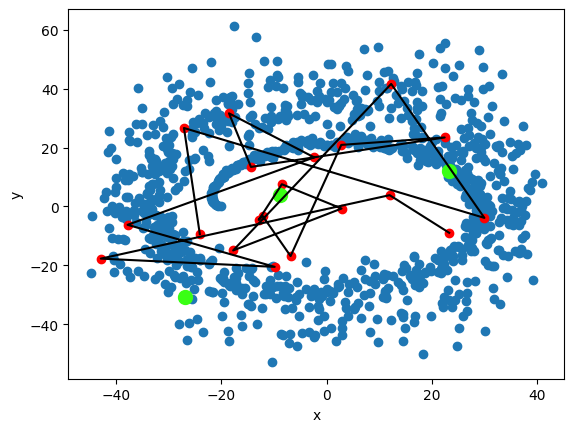

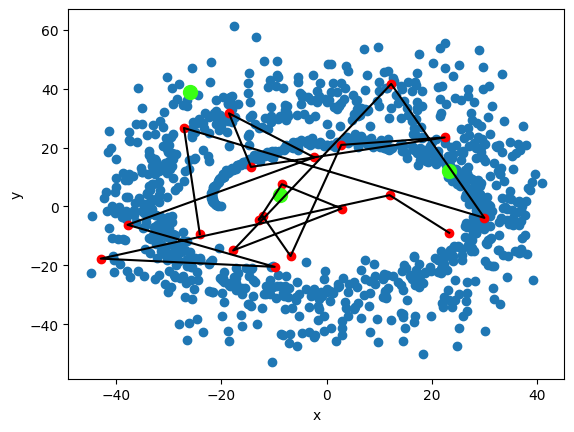

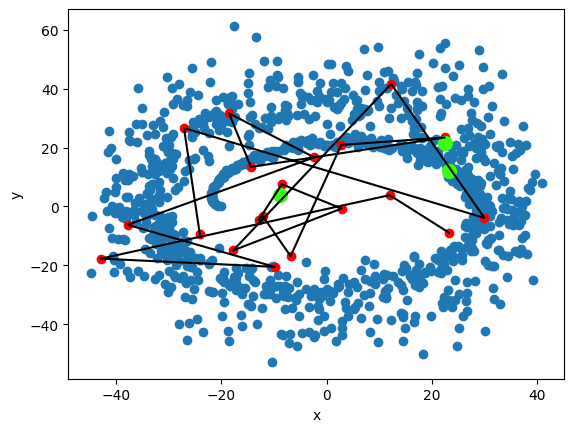

In [8]:
# 6.3
for i in range(100, 1001, 100):
    som.forward(np.array([x[i], y[i]]), update=False)
    som.plot((x, y), highlight=True)

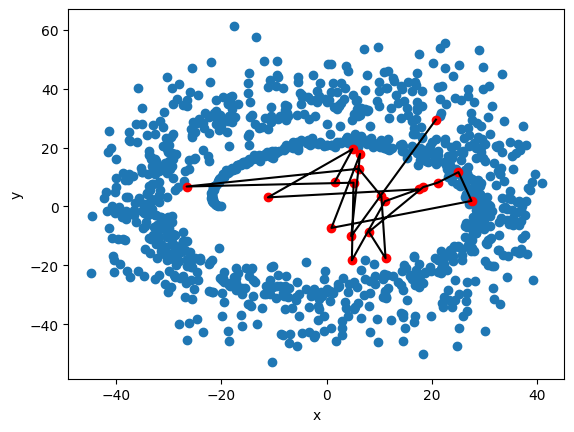

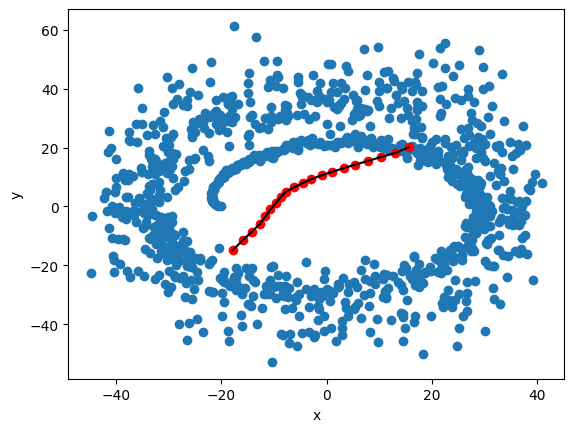

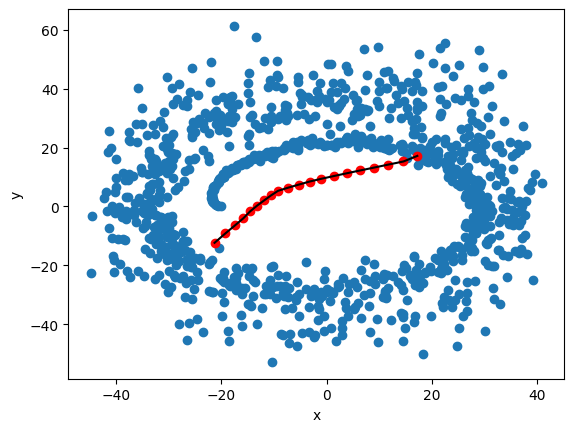

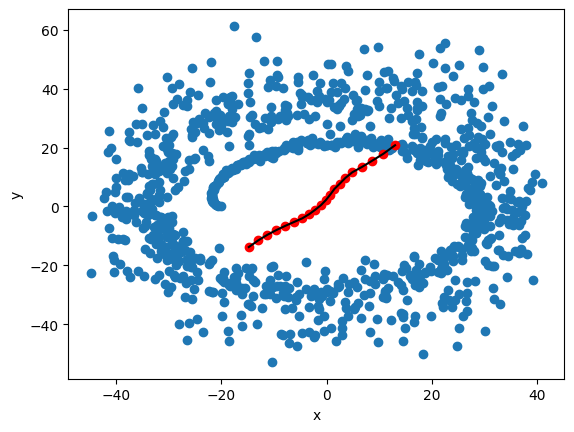

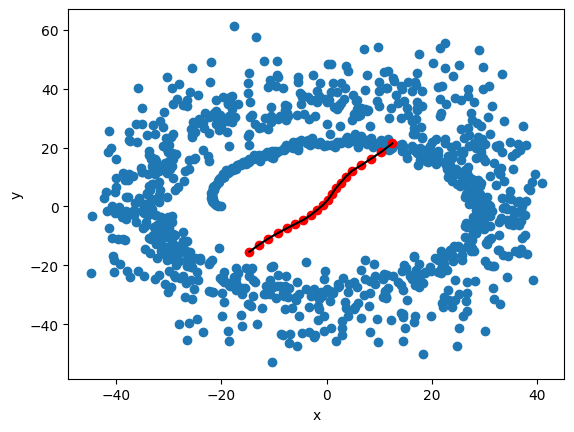

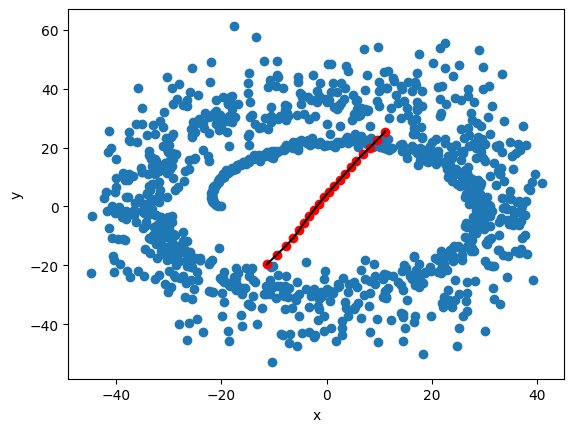

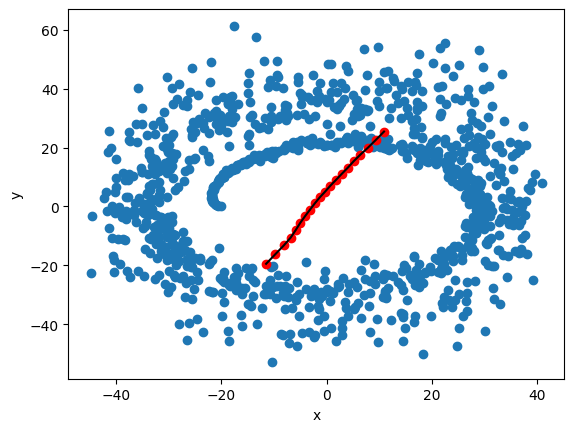

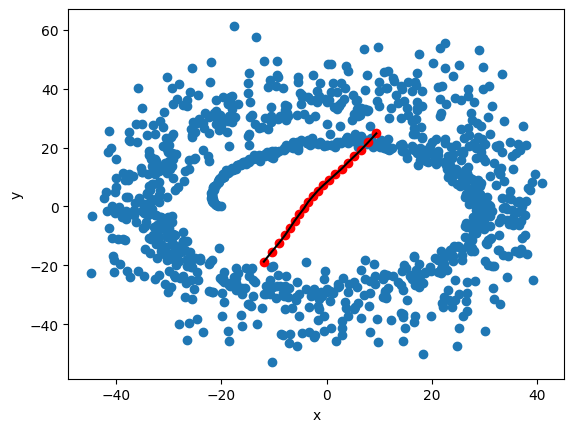

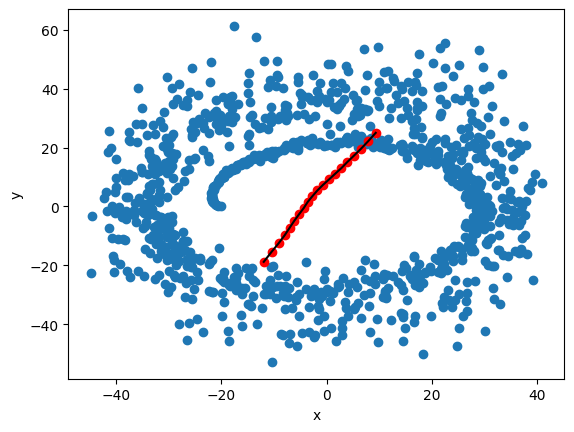

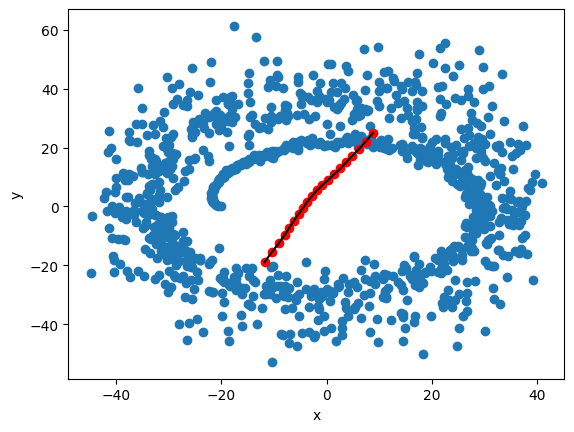

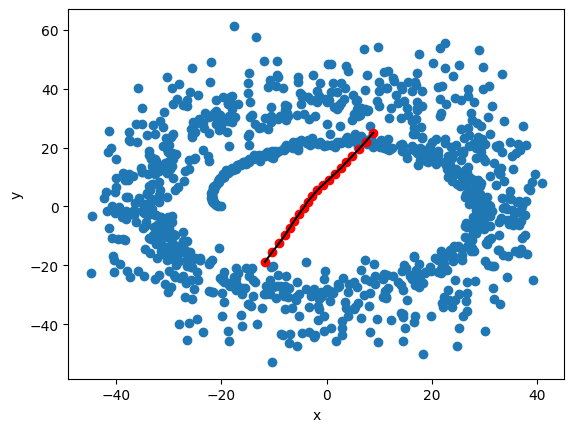

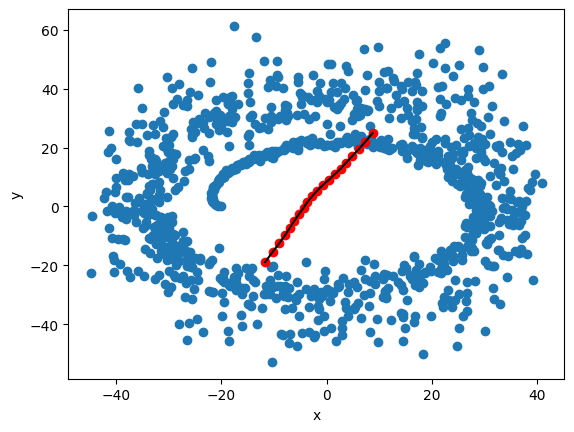

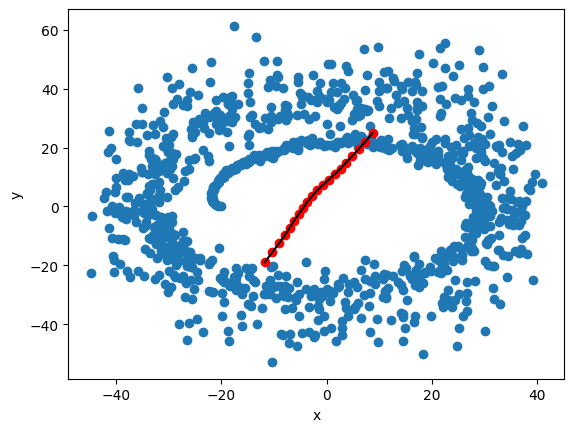

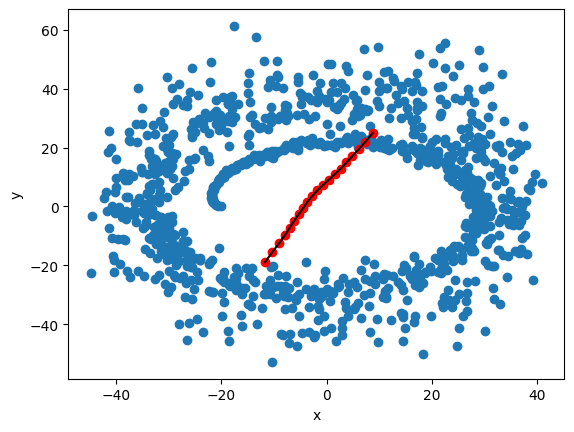

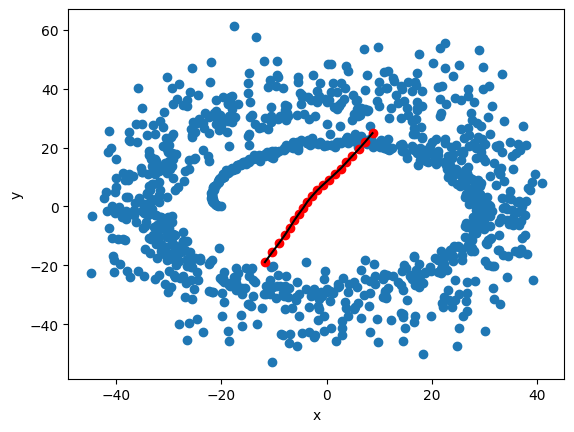

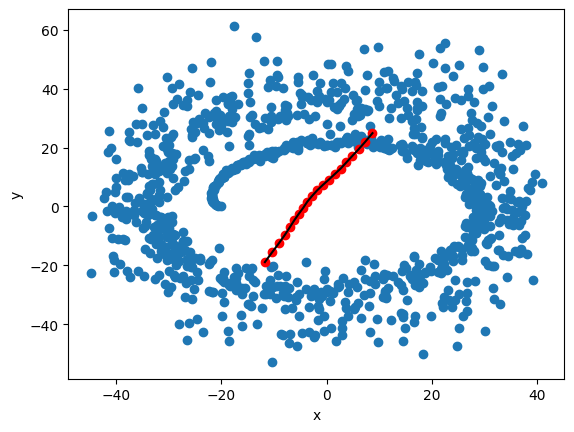

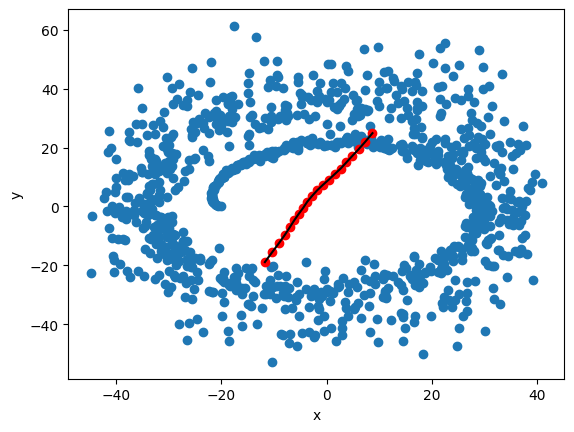

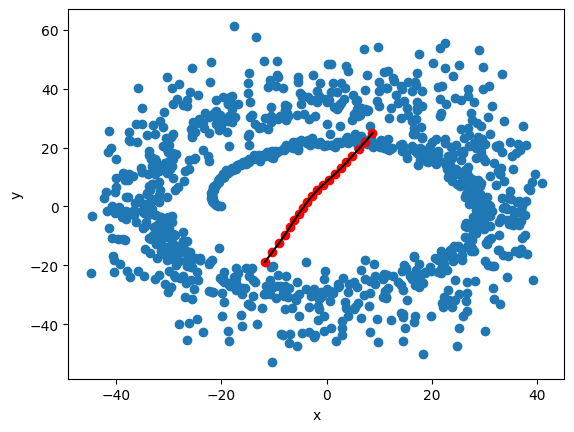

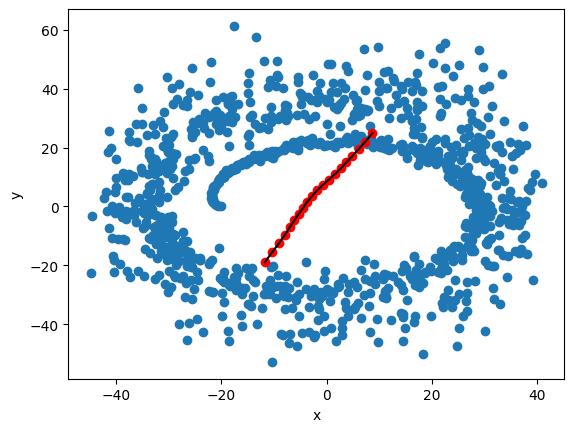

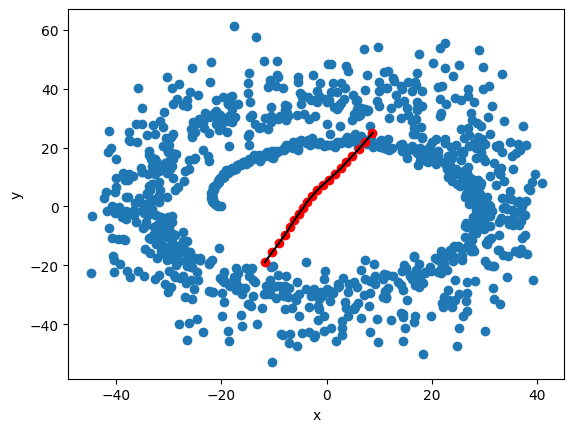

In [23]:
# 6.4
som = SOM2d((1, 20, 2), 0.2)
for epoch in range(10):
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    for num, (xi, yi) in enumerate(zip(x[indices], y[indices])):
        som.forward(np.array([xi, yi]))
        if num % 1001 == 0:
            som.plot((x, y))

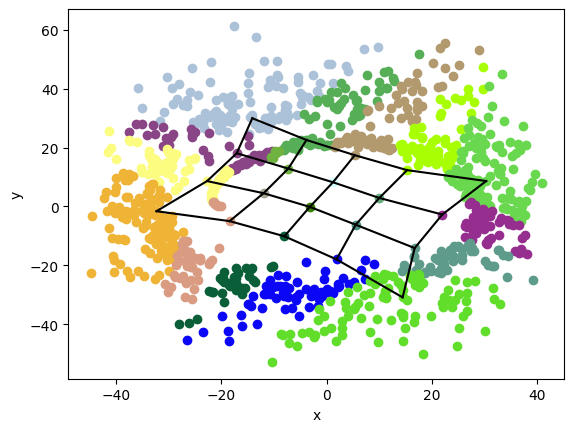

In [292]:
# 6.5
som.plot_zones((x, y))